In [27]:
import algorithm as al
import numpy as np
import pandas as pd

In [28]:
# train = pd.read_excel('../archive/Raisin_Dataset.xlsx')
train = pd.read_csv('../../GR1/train_occupancy_data.csv')
train

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,20.7900,24.7900,433.0,645.25,0.003759,1
1,23.0250,29.9175,469.0,1246.00,0.005212,1
2,22.8400,30.8400,444.0,1361.75,0.005314,1
3,22.6000,25.0000,433.0,832.00,0.004238,1
4,21.8900,28.2900,509.0,1159.80,0.004596,1
...,...,...,...,...,...,...
1860,20.4725,24.0500,0.0,472.75,0.003576,0
1861,20.8650,24.9175,0.0,547.75,0.003797,0
1862,20.5750,22.2000,0.0,449.75,0.003320,0
1863,20.6250,24.4175,0.0,467.75,0.003665,0


In [29]:
train = train.to_numpy()
R_train = train[:, 0:-1]
R_train
# R_train = np.random.rand(100, 10)

array([[2.079000e+01, 2.479000e+01, 4.330000e+02, 6.452500e+02,
        3.759479e-03],
       [2.302500e+01, 2.991750e+01, 4.690000e+02, 1.246000e+03,
        5.212351e-03],
       [2.284000e+01, 3.084000e+01, 4.440000e+02, 1.361750e+03,
        5.314070e-03],
       ...,
       [2.057500e+01, 2.220000e+01, 0.000000e+00, 4.497500e+02,
        3.320056e-03],
       [2.062500e+01, 2.441750e+01, 0.000000e+00, 4.677500e+02,
        3.664984e-03],
       [2.039000e+01, 2.250000e+01, 0.000000e+00, 4.357500e+02,
        3.326758e-03]])

In [30]:
M, N, H = al.method1(R_train, 0.45)

M = np.around(M, 3)
N = np.around(N, 3)
H = np.around(H, 3)

U, S = al.method3(R_train, 2, 1.7, 0.45, 'distance_function')

Initial centroids:
[[[5.35411796e-01 4.39387038e-02 4.20649501e-01]
  [9.08650764e-01 8.80939979e-04 9.04682964e-02]
  [9.54114911e-01 1.85222388e-04 4.56998666e-02]
  [8.40262942e-01 3.19426661e-03 1.56542792e-01]
  [4.06395675e-01 8.69369415e-02 5.06667384e-01]]

 [[3.40818775e-01 1.19150531e-01 5.40030693e-01]
  [5.44117043e-01 4.17777161e-02 4.14105241e-01]
  [9.04989613e-01 9.63645583e-04 9.40467417e-02]
  [4.04915425e-01 8.75726850e-02 5.07511890e-01]
  [6.13511551e-01 2.71590324e-02 3.59329416e-01]]]
iteration: 0
U:
[[0.43079546 0.56920454]
 [0.42890446 0.57109554]
 [0.43036344 0.56963656]
 ...
 [0.43431806 0.56568194]
 [0.43245879 0.56754121]
 [0.43435985 0.56564015]]
S:
[[[0.00243078 0.85879195 0.13877727]
  [0.00207573 0.86789666 0.13002762]
  [0.00636259 0.78868556 0.20495184]
  [0.00238198 0.86072823 0.13688979]
  [0.00204872 0.86896273 0.12898855]]

 [[0.00244042 0.85855131 0.13900827]
  [0.00208243 0.8677105  0.13020708]
  [0.0063998  0.7881728  0.2054274 ]
  [0.00239484 

In [31]:
X = np.dstack((M,N,H))
P = X.shape[0]
y = np.empty(P, dtype = object)
for i in range(P):
    if al.distance_function(X[i], S[0]) < al.distance_function(X[i], S[1]): y[i] = 0
    else: y[i] = 1

print(np.sum(y == train[:,-1])/P)

0.8246648793565684


In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(M))
centroids = pd.DataFrame(pca.fit_transform(S[:,:,0]))

In [34]:
import matplotlib.pyplot as plt

In [35]:
label = train[:,-1]

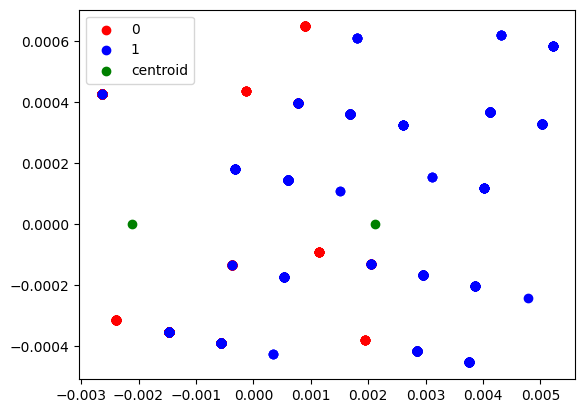

In [36]:
plt.scatter(transformed[label==0][0], transformed[label==0][1], label=0, c='red')
plt.scatter(transformed[label==1][0], transformed[label==1][1], label=1, c='blue')
plt.scatter(centroids[0], centroids[1], label='centroid', c='green')
plt.legend()
plt.show()

In [37]:
test1 = X.reshape(X.shape[0],X.shape[1]*X.shape[2])

In [38]:
test2 = S.reshape(S.shape[0], S.shape[1]*S.shape[2])

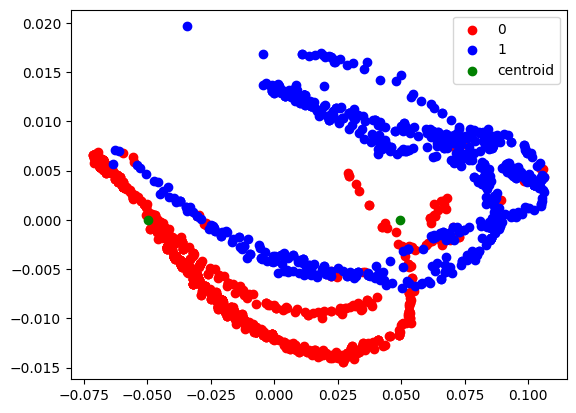

In [39]:
pca = PCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(test1))
centroids = pd.DataFrame(pca.fit_transform(test2))
plt.scatter(transformed[label==0][0], transformed[label==0][1], label=0, c='red')
plt.scatter(transformed[label==1][0], transformed[label==1][1], label=1, c='blue')
plt.scatter(centroids[0], centroids[1], label='centroid', c='green')
plt.legend()
plt.show()

In [40]:
true_labels = train[:, -1]
CA = al.calculate_CA(true_labels, y)
PC = al.calculate_PC(U)
# SC = al.calculate_SC(R_train, U, S)
# XB = al.calculate_XB(R_train, U, S) 
# DI = al.calculate_DI(R_train, U, S)  

# Print the evaluation metrics
print(f'Clustering Accuracy (CA): {CA}')
print(f'Partition Coefficient (PC): {PC}')
# print(f'Partition Index (SC): {SC}')
# print(f'Xie-Beni Index (XB): {XB}')
# print(f'Dunn Index (DI): {DI}')

Clustering Accuracy (CA): 0.8246648793565684
Partition Coefficient (PC): 0.9049743617535662
